<a href="https://colab.research.google.com/github/voxfox01/2025-Harvard-NASA-Collaboration/blob/main/Labeling_Analysis_CLEAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
# Data Manipulations
import pandas as pd
import numpy as np
import re

# Statistics
import scipy.stats as stats
from statsmodels.graphics.mosaicplot import mosaic

# Visualization
import plotly.graph_objects as go
import plotly.colors as pcolors
import matplotlib.pyplot as plt
import seaborn as sns

# System
import os
import sys
import gc

# Colab
from google.colab import userdata

In [ ]:
import plotly.express as px

# Load data

In [ ]:
# filepath
file_path = "/content/drive/MyDrive/Harvard/Capstone/Classification/globe_site_data_Analysis_v2.csv"

# Load csv with pandas with all strings formats
data = pd.read_csv(file_path, dtype=str)
data.head(3)

,site_id,name,latitude,longitude,elevation,elevation_type,location_source,comments,activated_at,water_body_name,...,area_unit,depth,depth_unit,water_sample_location,can_see_bottom,bank_material,bedrock_type,freshwater_habitat,salt_habitat,harvard_class
0,1,GLOBE Boulder,40.1,-105.17,1655,NaN,gps,NaN,13:18.1,Mosquito Source Water Body,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,NaN,NaN,Inconclusive
1,1000,Surface Water Site 01:SWS-01,6.4167,2.6667,16.1,ellipsoidal,gps,please replace with Hydrology Site Comments,4/4/2004 0:00,NaN,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,NaN,NaN,River_Stream
2,100001,22JGS446679,-25.586154,-48.564832,8.1,NaN,gps,NaN,24:31.2,Mosquito Habitat,...,NaN,NaN,NaN,NaN,NaN,Unknown,Unknown,NaN,NaN,Inconclusive


# Analysis

## General

In [ ]:
for wbs_label, vol in wbs_counts.items():
    print(wbs_label, vol)


NULL 18162
other 917
river 2899
stream 2334
pond 1366
other 917
lake 739
reservoir 449
ocean 361
bay 285
ditch 192
puddles_animal 162
estuary 117
agriculture 101
marsh_swamp 90


In [ ]:
color_dict = {
    "NULL": "rgba(51,56,39,1)",
    "unknown": "rgba(9,97,146,1)",
}

In [ ]:
fig = go.Figure()

################################
# BAR 1:
################################
total_rows = len(data)
null_count = data["water_body_source"].isna().sum()
notnull_count = total_rows - null_count

# Null first (bottom)
fig.add_trace(go.Bar(
    x=["WaterBodySource Vol"],
    y=[null_count],
    name="Null values",
    text=[f"{(null_count/total_rows)*100:.1f}%<br>Null values"],
    textposition="inside",
    marker_color="rgba(51,56,39,1)",
    showlegend=False
))
# Not Null stacked on top
fig.add_trace(go.Bar(
    x=["WaterBodySource Vol"],
    y=[notnull_count],
    name="Labeled values",
    text=[f"{(notnull_count/total_rows)*100:.1f}%<br>Labeled values"],
    textposition="inside",
    marker_color="rgba(9,97,146,1)",
    showlegend=False,
))

################################
# BAR 2:
################################
# 1) Count distinct water_body_source (including Null)
wbs_counts = data["water_body_source"].fillna("NULL").value_counts()

# Order of stack
bottom_values = ["NULL","other"]
existing_cats = wbs_counts.index.tolist()
new_order = [c for c in bottom_values if c in existing_cats] + [c for c in existing_cats if c not in bottom_values]
wbs_counts = wbs_counts.reindex(new_order)

# 3) One Bar trace per distinct category
for wbs_label, vol in wbs_counts.items():
    color_val = None
    txt_val = ""
    # Color
    if wbs_label == "NULL":
        color_val = "rgba(51,56,39,1)"
        txt_val = "Null values"
    elif wbs_label == "other":
        color_val = "rgba(131,140,140,1)"
        #txt_val = "Other"

    fig.add_trace(go.Bar(
        x=["WaterBodySource Cat"],
        y=[vol],
        name=str(wbs_label),
        text=[f"{str(vol)}<br>{txt_val}"],
        textposition="inside",
        marker_color=color_val,
        showlegend=False
    ))

################################
# BAR 3:
################################
special_cats = ["unknown", "Insufficient", "inconclusive"]

# 1) Count distinct harvard_class
hc_counts = data["harvard_class"].fillna("NULL").value_counts()

# 2) Reorder so special categories come first (bottom) if they exist
cat_in_data = hc_counts.index.tolist()
reordered = []
# Add each special cat in order if it's in the data
for cat in special_cats:
    if cat in cat_in_data:
        reordered.append(cat)
# Then add everything else that's not in special_cats
reordered.extend([x for x in cat_in_data if x not in special_cats])

# If "NULL" or other placeholders are in the data, they'll appear
# after the special ones, or you can tweak further ordering logic
hc_counts = hc_counts.reindex(reordered)

# 3) One Bar trace per distinct harvard_class
for hc_label, vol in hc_counts.items():
    fig.add_trace(go.Bar(
        x=["Havard's Classification"],
        y=[vol],
        name=str(hc_label),
        text=[str(vol)],
        textposition="inside"
    ))

################################
# Final layout: stacked bars, single figure
################################
fig.update_layout(
    barmode="stack",  # make stacked
    title="Classification comparison",
    xaxis=dict(title="Water Body Source | Havard's Classification"),
    yaxis=dict(title="Volume"),
    width=1000,
    height=800
)

fig.show()


In [ ]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# --------------------------------------------------------------------------------
# Sample data reference (replace with your actual DataFrame "data")
# data = pd.DataFrame({
#     "water_body_source": [...],
#     "harvard_class": [...]
# })
# --------------------------------------------------------------------------------

# ---------------------------
# 1) BAR 1: water_body_source, (Null vs. Not Null in harvard_class), show PERCENT
# ---------------------------
df_bar1 = data.copy()
df_bar1["harvard_class_null_or_not"] = df_bar1["harvard_class"].isna().map({True: "Null", False: "Not Null"})

# Force "Null" to come first so it’s at the bottom of the stack
df_bar1["harvard_class_null_or_not"] = pd.Categorical(
    df_bar1["harvard_class_null_or_not"],
    categories=["Null", "Not Null"],
    ordered=True
)

fig_bar1 = px.histogram(
    df_bar1,
    x="water_body_source",
    color="harvard_class_null_or_not",
    barmode="stack",
    barnorm="percent",    # stack heights = 100%, displayed as %
    text_auto=True        # show % on each segment
)
fig_bar1.update_layout(
    xaxis_title="Water Body Source",
    yaxis_title="Percentage",
    title="Bar 1 (Percent): Null vs Not Null"
)

# ---------------------------
# 2) BAR 2: water_body_source, each distinct harvard_class (including null), absolute volume
#    Null on bottom
# ---------------------------
df_bar2 = data.copy()
df_bar2["harvard_class_filled"] = df_bar2["harvard_class"].fillna("NULL")

distinct_classes = df_bar2["harvard_class_filled"].unique().tolist()
# Put "NULL" first, so it's at the bottom
distinct_classes_no_null = [c for c in distinct_classes if c != "NULL"]
cat_order_2 = ["NULL"] + distinct_classes_no_null
df_bar2["harvard_class_filled"] = pd.Categorical(
    df_bar2["harvard_class_filled"],
    categories=cat_order_2,
    ordered=True
)

fig_bar2 = px.histogram(
    df_bar2,
    x="water_body_source",
    color="harvard_class_filled",
    barmode="stack",
    text_auto=True  # display volume counts on each segment
)
fig_bar2.update_layout(
    xaxis_title="Water Body Source",
    yaxis_title="Count",
    title="Bar 2 (Counts): Distinct harvard_class incl. Null"
)

# ---------------------------
# 3) BAR 3: harvard_class on x-axis,
#    stacked by water_body_source,
#    "unknown", "Insufficient", "inconclusive" on the bottom
#    Show absolute counts
# ---------------------------
df_bar3 = data.copy()
df_bar3["water_body_source"] = df_bar3["water_body_source"].fillna("NULL")

special_cats = ["unknown", "Insufficient", "inconclusive"]
all_wbs = df_bar3["water_body_source"].unique().tolist()
others = [c for c in all_wbs if c not in special_cats]
cat_order_3 = special_cats + others

df_bar3["water_body_source"] = pd.Categorical(
    df_bar3["water_body_source"],
    categories=cat_order_3,
    ordered=True
)

fig_bar3 = px.histogram(
    df_bar3,
    x="harvard_class",
    color="water_body_source",
    barmode="stack",
    text_auto=True  # display volume counts
)
fig_bar3.update_layout(
    xaxis_title="Harvard Class",
    yaxis_title="Count",
    title="Bar 3 (Counts): Water Body Source stacked; special cats bottom"
)

# ---------------------------
# 4) Combine into 1 figure with subplots
#    We'll extract the traces from each fig and add them into a single figure
# ---------------------------
combined_fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=["Bar 1", "Bar 2", "Bar 3"]
)

# Add bar1
for trace in fig_bar1.data:
    combined_fig.add_trace(trace, row=1, col=1)

# Add bar2
for trace in fig_bar2.data:
    combined_fig.add_trace(trace, row=1, col=2)

# Add bar3
for trace in fig_bar3.data:
    combined_fig.add_trace(trace, row=1, col=3)

# Now adjust subplot layouts as needed
combined_fig.update_layout(
    width=1500,    # optional: make wide enough for 3 bar plots
    height=600,
    title_text="Three Bar Visualizations in One Figure"
)

combined_fig.show()


## Contingency Table
- ability to quickly see any dominate relationships between the labeling.

In [ ]:
# cross table
cross_table = pd.crosstab(data.water_body_source, data.harvard_class)
cross_table

harvard_class,Inconclusive,Insufficient,Marsh,Non-natural,Ocean,Pond_Lake,River_Stream,Unknown
water_body_source,,,,,,,,
agriculture,24,0,38,5,0,18,16,0
bay,0,0,22,1,228,9,25,0
ditch,36,6,73,34,0,12,31,0
estuary,0,1,53,1,24,4,34,0
lake,21,5,35,3,7,603,65,0
marsh_swamp,5,0,60,3,1,7,14,0
ocean,5,1,46,0,247,9,53,0
other,0,2,246,49,57,105,193,265
pond,15,1,69,12,4,782,207,276


- Percentage Distributions cross row (water body source) and columns (classification labels)

In [ ]:
row_perc = cross_table.apply(lambda x: x / x.sum() * 100, axis=1)
row_perc

harvard_class,Inconclusive,Insufficient,Marsh,Non-natural,Ocean,Pond_Lake,River_Stream,Unknown
water_body_source,,,,,,,,
agriculture,23.762376,0.000000,37.623762,4.950495,0.000000,17.821782,15.841584,0.000000
bay,0.000000,0.000000,7.719298,0.350877,80.000000,3.157895,8.771930,0.000000
ditch,18.750000,3.125000,38.020833,17.708333,0.000000,6.250000,16.145833,0.000000
estuary,0.000000,0.854701,45.299145,0.854701,20.512821,3.418803,29.059829,0.000000
lake,2.841678,0.676590,4.736130,0.405954,0.947226,81.596752,8.795670,0.000000
marsh_swamp,5.555556,0.000000,66.666667,3.333333,1.111111,7.777778,15.555556,0.000000
ocean,1.385042,0.277008,12.742382,0.000000,68.421053,2.493075,14.681440,0.000000
other,0.000000,0.218103,26.826609,5.343511,6.215921,11.450382,21.046892,28.898582
pond,1.098097,0.073206,5.051245,0.878477,0.292826,57.247438,15.153734,20.204978


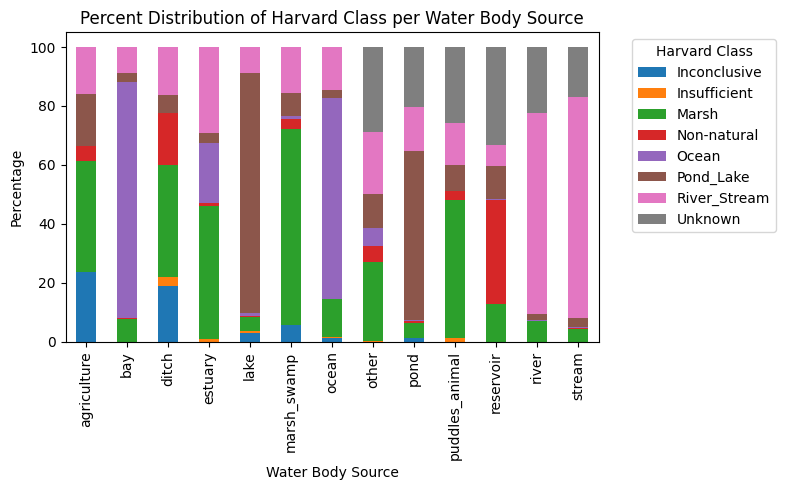

In [ ]:
row_perc.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.xlabel('Water Body Source')
plt.ylabel('Percentage')
plt.title('Percent Distribution of Harvard Class per Water Body Source')
plt.legend(title='Harvard Class', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

In [ ]:
col_perc = cross_table.apply(lambda x: x / x.sum() * 100, axis=0)
col_perc

harvard_class,Inconclusive,Insufficient,Marsh,Non-natural,Ocean,Pond_Lake,River_Stream,Unknown
water_body_source,,,,,,,,
agriculture,22.641509,0.000000,3.531599,1.805054,0.000000,1.037464,0.361174,0.000000
bay,0.000000,0.000000,2.044610,0.361011,38.190955,0.518732,0.564334,0.000000
ditch,33.962264,33.333333,6.784387,12.274368,0.000000,0.691643,0.699774,0.000000
estuary,0.000000,5.555556,4.925651,0.361011,4.020101,0.230548,0.767494,0.000000
lake,19.811321,27.777778,3.252788,1.083032,1.172529,34.755043,1.467269,0.000000
marsh_swamp,4.716981,0.000000,5.576208,1.083032,0.167504,0.403458,0.316027,0.000000
ocean,4.716981,5.555556,4.275093,0.000000,41.373534,0.518732,1.196388,0.000000
other,0.000000,11.111111,22.862454,17.689531,9.547739,6.051873,4.356659,14.946418
pond,14.150943,5.555556,6.412639,4.332130,0.670017,45.072046,4.672686,15.566836


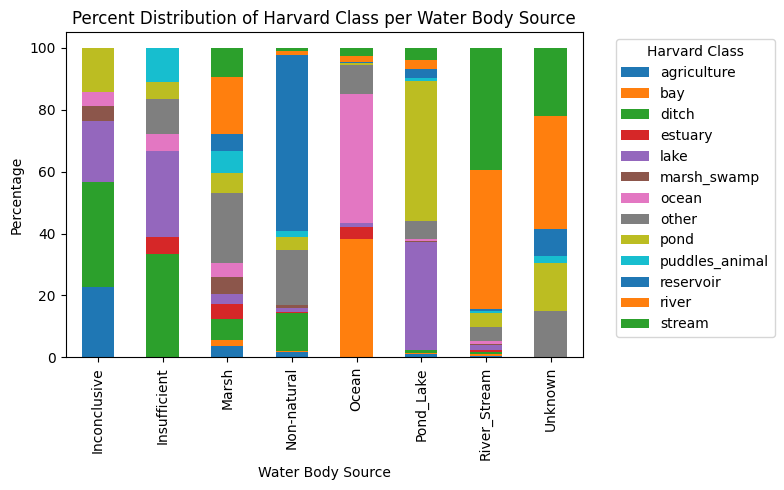

In [ ]:
col_perc.T.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.xlabel('Water Body Source')
plt.ylabel('Percentage')
plt.title('Percent Distribution of Harvard Class per Water Body Source')
plt.legend(title='Harvard Class', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

## Chi-square statistics

### Chi-square Test

<br><p>
<b>Objective:</b> To determine whether there is a statistically significant association between “water body source” and “Harvard classification” through a test of independence.
<br><p>
$H_o=\text{There is no relationship between “water body source” and “harvard classication.”}$
<br><p>
$H_\alpha=\text{There is some relationship (non-independence) between the two.}$
<br><p>
<b>Rationale:</b> I hypothesized that, in a manual labeling process, a human analyst would rely heavily on the water body source when assigning classifications.

In [ ]:
chi2, p_value, dof, expected = stats.chi2_contingency(cross_table)
print("Chi-square statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)

Chi-square statistic: 16250.113509630639
p-value: 0.0
Degrees of freedom: 84


<b>Findings:</b>
1. Using a 5% significance level, we can reject the null hypothesis and conclude there is a statistically significant relationship between the water body source and the model's classification.

2. These findings also indicate that the large language model's classification approach closely parallels the methodology a human would employ.

## Cramérs V statistics

<br><p>
<b>Objective:</b> To measure the strength of the association between “water body source” and “Harvard classification.”

<br>

<table>
<tr><th>Magnitude classes</th><th>Magnitude rule</th></tr>
<tr><td>Very weak relationship</td><td>$< 0.1$</td></tr>
<tr><td>Moderate relationship</td><td>$ 0.1-0.3$</td></tr>
<tr><td>Strong relationship</td><td>$>0.3$</td></tr>
</table>


<br><p>
<b>Rationale:</b> While the Chi-square test confirms whether a statistically significant relationship exists, Cramér's V provides additional insight by indicating the magnitude of this relationship. By quantifying the effect size, it enables more nuanced interpretation of how closely the two variables are related.

In [ ]:
# Cramer helper function

def cramers_v(confusion_matrix):
    chi2, _, _, _ = stats.chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt((chi2 / n) / (min(r - 1, k - 1)))

v = cramers_v(cross_table)
print("Cramér’s V:", v)

Cramér’s V: 0.4815249102818491


<b>Findings:</b>

The Cramér’s V value of 0.43 indicates a moderate-to-strong association between “water body source” and the classification outcome. This result underscores the practical significance of the relationship identified by the Chi-square test.

# Visualizations

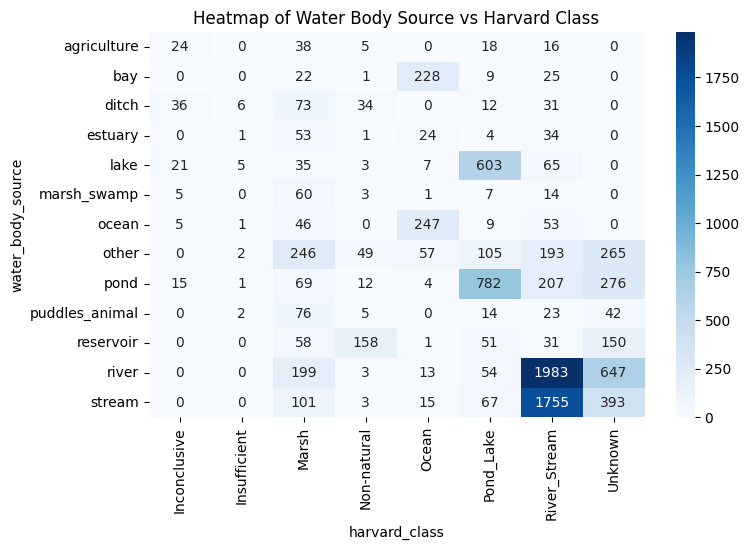

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(cross_table, annot=True, fmt="d", cmap="Blues")
plt.title('Heatmap of Water Body Source vs Harvard Class')
plt.show()

<Figure size 800x500 with 0 Axes>

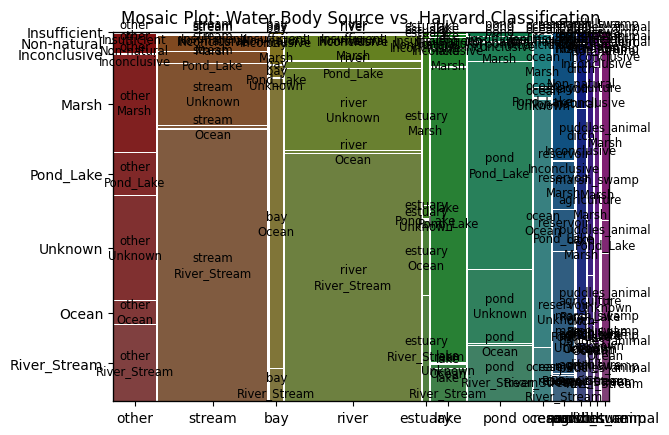

In [ ]:
plt.figure(figsize=(8, 5))
mosaic(data, ['water_body_source', 'harvard_class'])
plt.title('Mosaic Plot: Water Body Source vs. Harvard Classification')
plt.show()

In [ ]:
water_sources = cross_table.index.tolist()
harvard_classes = cross_table.columns.tolist()

# Node labels: first the sources, then the classes
node_labels = water_sources + harvard_classes


links_source = []
links_target = []
links_value = []

for i, src in enumerate(water_sources):
    for j, cls in enumerate(harvard_classes):
        # Node index for the source
        src_idx = i
        # Node index for the harvard class
        tgt_idx = len(water_sources) + j
        # Flow value
        val = cross_table.loc[src, cls]

        links_source.append(src_idx)
        links_target.append(tgt_idx)
        links_value.append(val)

fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=node_labels
    ),
    link = dict(
        source=links_source,
        target=links_target,
        value=links_value
    )
)])

fig.update_layout(title_text="Sankey Diagram: Water Body Source → Harvard Class")
fig.show()


In [ ]:
len(water_sources)

13

In [ ]:
len(harvard_classes)

8

In [ ]:
import re

In [ ]:
import plotly.graph_objects as go
import plotly.colors as pcolors

###########################
# 1. Define a helper function
#    to convert any color to 'rgba(r,g,b,alpha)'
###########################
# def to_rgba(color_str, alpha=0.4):
#     """
#     Convert a color (hex, named color, or 'rgb(...)') to an 'rgba(r,g,b,alpha)' string.
#     If it's already 'rgb()' or 'rgba()', we just return it as is.
#     If it's hex (#RRGGBB), parse it; otherwise, return the original color_str.
#     """
#     cstr = color_str.strip().lower()

#     # If the color is already in 'rgba' or 'rgb' form, just return it as is.
#     if cstr.startswith('rgba') or cstr.startswith('rgb'):
#         return color_str  # might already have its own alpha

#     # If it's hex, like '#1f77b4', parse it.
#     if cstr.startswith('#'):
#         # remove '#'
#         hex_part = cstr.lstrip('#')
#         # handle short hex like #abc => #aabbcc if you wish, but typically Plotly's palettes are 6 or 3 chars
#         if len(hex_part) == 6:  # standard #RRGGBB
#             r = int(hex_part[0:2], 16)
#             g = int(hex_part[2:4], 16)
#             b = int(hex_part[4:6], 16)
#             return f'rgba({r},{g},{b},{alpha})'
#         else:
#             # It's an unusual or short hex format => just return as is
#             return color_str

#     # If it's a named color like "blue" or "gold", we leave it as is (no alpha).
#     # You could try to convert these to RGB via webcolors or a Plotly function, but let's keep it simple.
#     return color_str

def to_rgba(color_str, alpha=0.4):
    """
    Convert a color (hex, named color, rgb(...), or rgba(...)) into 'rgba(r,g,b,alpha)'.
    If it's 'rgb(r,g,b)', we add alpha. If it's 'rgba(r,g,b,a)', we override the alpha.
    If it's hex (#RRGGBB), we parse it; otherwise, we leave it as is.
    """
    cstr = color_str.strip().lower()

    # Case 1: Already in RGBA
    # e.g. "rgba(106,168,79,1.0)"
    if cstr.startswith('rgba('):
        pattern = r'^rgba\(\s*(\d+)\s*,\s*(\d+)\s*,\s*(\d+)\s*,\s*([0-9\.]+)\s*\)$'
        match = re.match(pattern, cstr)
        if match:
            r, g, b, _old_alpha = match.groups()
            return f'rgba({r},{g},{b},{alpha})'
        else:
            return color_str

    # Case 2: In RGB
    # e.g. "rgb(106,168,79)"
    if cstr.startswith('rgb('):
        pattern = r'^rgb\(\s*(\d+)\s*,\s*(\d+)\s*,\s*(\d+)\s*\)$'
        match = re.match(pattern, cstr)
        if match:
            r, g, b = match.groups()
            return f'rgba({r},{g},{b},{alpha})'
        else:
            return color_str

    # Case 3: Hex code #RRGGBB
    if cstr.startswith('#'):
        hex_part = cstr.lstrip('#')
        if len(hex_part) == 6:
            try:
                r = int(hex_part[0:2], 16)
                g = int(hex_part[2:4], 16)
                b = int(hex_part[4:6], 16)
                return f'rgba({r},{g},{b},{alpha})'
            except ValueError:
                return color_str  # Not a valid hex -> return original
        # If it's short hex (#abc) or #RRGGBBAA, we skip parsing
        return color_str

    # Case 4: Named color or unrecognized format => leave it alone
    return color_str
###########################
# 2. Build Sankey from your cross_table
###########################
# Assuming 'cross_table' is a pandas.DataFrame with
# row labels as water body sources and column labels as harvard classes.
# e.g., cross_table = pd.crosstab(df['water body source'], df['harvard class'])

# Extract row + column labels
water_sources = cross_table.index.tolist()
harvard_classes = cross_table.columns.tolist()
num_sources = len(water_sources)
num_classes = len(harvard_classes)

# Node labels: first the water sources, then the harvard classes
node_labels = water_sources + harvard_classes

# Create link lists
links_source = []
links_target = []
links_value = []

for i, src in enumerate(water_sources):
    for j, cls in enumerate(harvard_classes):
        src_idx = i
        tgt_idx = num_sources + j
        val = cross_table.loc[src, cls]
        links_source.append(src_idx)
        links_target.append(tgt_idx)
        links_value.append(val)

###########################
# 3. Assign Colors
###########################
# Use the Vivid palette from plotly.colors.qualitative
vivid_colors = pcolors.qualitative.Vivid

# 3a) Node colors (Vivid has ~10 colors; if you have >10 nodes, you'll see repeats)
node_colors = []
for i in range(len(node_labels)):
    node_colors.append(vivid_colors[i % len(vivid_colors)])

# 3b) Link colors => typically match the color of the source node, but reduce alpha
link_colors = []
opacity = 0.5

for src_idx in links_source:
    # node_colors[src_idx] might be a hex, or named color, or rgb
    link_rgba = to_rgba(node_colors[src_idx], alpha=opacity)
    link_colors.append(link_rgba)

###########################
# 4. Build the Sankey chart
###########################
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=node_labels,
        color=node_colors
    ),
    link=dict(
        source=links_source,
        target=links_target,
        value=links_value,
        color=link_colors
    )
)])

fig.update_layout(
    title_text="Sankey Diagram: Water Body Source → Harvard's Classification",
    font_size=10
)

fig.show()


In [ ]:
link_colors

['rgba(229,134,6,0.9)',
 'rgba(229,134,6,0.9)',
 'rgba(229,134,6,0.9)',
 'rgba(229,134,6,0.9)',
 'rgba(229,134,6,0.9)',
 'rgba(229,134,6,0.9)',
 'rgba(229,134,6,0.9)',
 'rgba(229,134,6,0.9)',
 'rgba(93,105,177,0.9)',
 'rgba(93,105,177,0.9)',
 'rgba(93,105,177,0.9)',
 'rgba(93,105,177,0.9)',
 'rgba(93,105,177,0.9)',
 'rgba(93,105,177,0.9)',
 'rgba(93,105,177,0.9)',
 'rgba(93,105,177,0.9)',
 'rgba(82,188,163,0.9)',
 'rgba(82,188,163,0.9)',
 'rgba(82,188,163,0.9)',
 'rgba(82,188,163,0.9)',
 'rgba(82,188,163,0.9)',
 'rgba(82,188,163,0.9)',
 'rgba(82,188,163,0.9)',
 'rgba(82,188,163,0.9)',
 'rgba(153,201,69,0.9)',
 'rgba(153,201,69,0.9)',
 'rgba(153,201,69,0.9)',
 'rgba(153,201,69,0.9)',
 'rgba(153,201,69,0.9)',
 'rgba(153,201,69,0.9)',
 'rgba(153,201,69,0.9)',
 'rgba(153,201,69,0.9)',
 'rgba(204,97,176,0.9)',
 'rgba(204,97,176,0.9)',
 'rgba(204,97,176,0.9)',
 'rgba(204,97,176,0.9)',
 'rgba(204,97,176,0.9)',
 'rgba(204,97,176,0.9)',
 'rgba(204,97,176,0.9)',
 'rgba(204,97,176,0.9)',
 'rgba(3

# Tree

In [ ]:
# Hierarchy: Water Body Source -> Harvard Class
labels = []
parents = []
values = []

# 2a. First, add each Water Body Source as a top-level node
for source in cross_table.index:
    labels.append(source)          # The node name
    parents.append("")             # No parent (top-level)
    values.append(cross_table.loc[source].sum())  # Sum of counts across all classes

# 2b. Then, add each Harvard Class under its Water Body Source
for source in cross_table.index:
    for hclass in cross_table.columns:
        labels.append(hclass)
        parents.append(source)               # The parent is the water source node
        values.append(cross_table.loc[source, hclass])

# Treemap chart
fig_treemap = go.Figure(go.Treemap(
    labels=labels,
    parents=parents,
    values=values,
    branchvalues="total"  # Tells Plotly that 'values' at each node are the total for that node (vs. remainder).
))

fig_treemap.update_layout(title="Treemap: Water Body Source & Harvard Class")
fig_treemap.show()

fig_sunburst = go.Figure(go.Sunburst(
    labels=labels,
    parents=parents,
    values=values,
    branchvalues="total"  # same logic as in the Treemap
))

fig_sunburst.update_layout(title="Sunburst: Water Body Source & Harvard Class")
fig_sunburst.show()